# Aim

General testing for sysid modifications.

In [1]:
# imports

import numpy as np
from scipy import optimize, signal, interpolate, stats
import matplotlib.pyplot as plt
import copy
import itertools
%matplotlib inline
from ao_observe import *

In [2]:
# run everything

pos = make_vibe_data() + make_atm_data()
pos_noisy = pos + np.random.normal(0, measurement_noise, times.size)

In [3]:
psd = get_psd(pos_noisy)
psd = noise_filter(psd)
params, variances = vibe_fit_freq(psd)

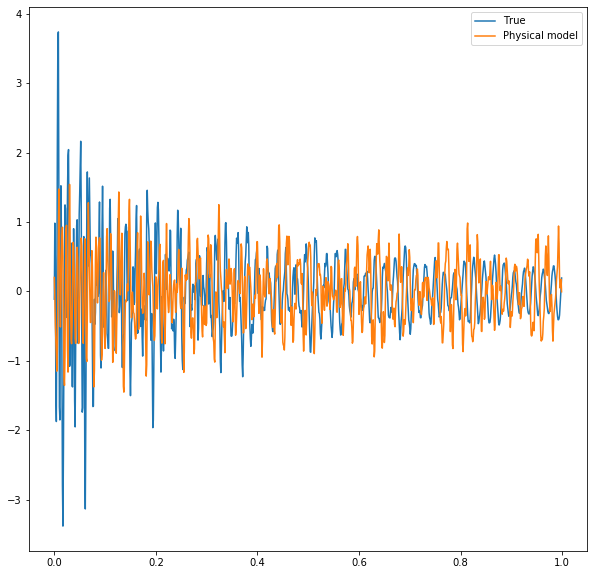

In [4]:
pos_r = simulate(params)
plt.figure(figsize=(10,10))
#plt.plot(times, pos_noisy, label='Measurements')
plt.plot(times, pos, label='True')
plt.plot(times, pos_r, label='Physical model')
#plt.plot(times, pos_r - pos, label='Residual')
plt.legend()

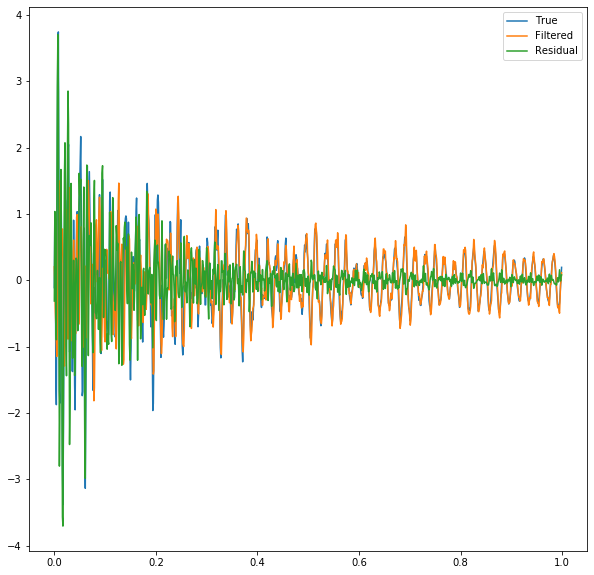

In [5]:
pos_k = kfilter(make_kfilter(params, variances), pos_noisy)
plt.figure(figsize=(10,10))
#plt.plot(times, pos_noisy, label='Measurements')
plt.plot(times, pos, label='True')
plt.plot(times, pos_k, label='Filtered')
delay = 0
if delay >= 0:
    plt.plot(times[delay:], pos[:len(pos)-delay] - pos_k[delay:], label='Residual')
else:
    plt.plot(times[:len(times)+delay], pos[-delay:] - pos_k[:len(pos)+delay], label='Residual')
plt.legend()

Average measurement error: 0.04653837083731796
Average filter/obs. error: 0.24484309857610864


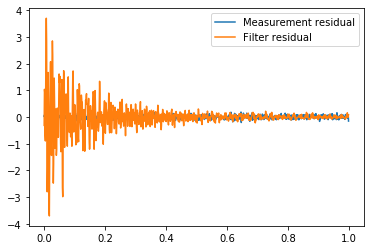

In [6]:
plt.figure(figsize=(6,4))
plt.plot(times, pos - pos_noisy, label='Measurement residual')
if delay >= 0:
    plt.plot(times[:len(times)-delay], pos[:len(pos)-delay] - pos_k[delay:], label='Filter residual')
else:
    plt.plot(times[:len(times)+delay], pos[-delay:] - pos_k[:len(pos)+delay], label='Residual')

plt.legend()

print("Average measurement error:", np.mean(np.abs(pos - pos_noisy)))
if delay >= 0:
    print("Average filter/obs. error:", np.mean(np.abs(pos[:len(pos)-delay] - pos_k[delay:])))
else:
    print("Average filter/obs. error:", np.mean(np.abs(pos[-delay:] - pos_k[:len(pos)+delay])))